# Titanic Problem
The following is a primitive attempt at solving the [Titanic](https://www.kaggle.com/c/titanic) Problem statement on Kaggle.
The code performs very basic data cleaning and analysis.

The processed data was passed through Logistic Regression feature of sklearn



In [1]:
# file access
import os

# linear algebra
import numpy as np
 
# data processing
import pandas as pd
 
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
 
# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

## Obtaining data from csv

In [16]:
InitialTraindata = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
InitialTraindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


For the sake for analysis of data, we can also use the data from the test case, hence we create a 'combined' dataset

In [18]:
combined = InitialTraindata
combined.drop(columns='Survived')

combined.append(test,sort=False)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
combined['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## Data Processing

From the above analysis, we realize that the certain cells in 'Age' and 'Cabin' columns are missing.
To counter the lack in data:

* Entirely remove the column of Cabin as it is missing way too many slots
* Fill empty cells of Age with the mean of remaining values from the 'Combined' data



In [20]:
InitialTraindata = InitialTraindata.drop(columns='Cabin')
InitialTraindata.info()
InitialTraindata['Age'] = InitialTraindata['Age'].fillna(combined['Age'].median())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


## Data Analysis

The different aspects of the passengers are being compared with respect to their chances for survival
This exercises, enables us to decide the features to be included and ignored.   

We utilize libraries like seaborn and matplotlib to understand the relation between the data

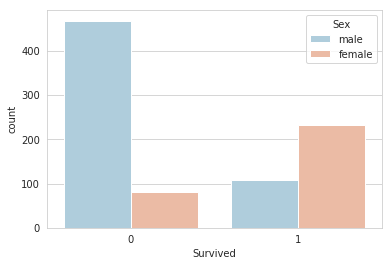

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data= InitialTraindata,palette='RdBu_r')


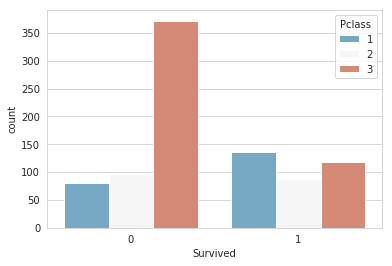

In [5]:
sns.countplot(x='Survived', hue='Pclass', data= InitialTraindata,palette='RdBu_r')


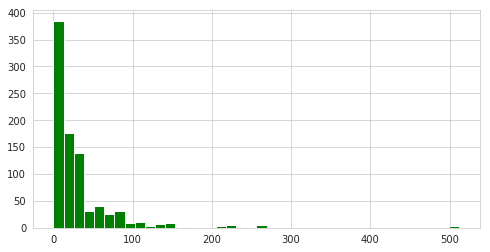

In [6]:
InitialTraindata['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [7]:
survived = InitialTraindata[InitialTraindata['Survived']==1]

survived.Sex.value_counts()
survived.Pclass.value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [22]:
InitialTraindata[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [77]:
checktitle = InitialTraindata[['Name', 'Survived']]
checktitle['Title'] = checktitle['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
checktitle.head()



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,Survived,Title
0,"Braund, Mr. Owen Harris",0,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Mrs
2,"Heikkinen, Miss. Laina",1,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Mrs
4,"Allen, Mr. William Henry",0,Mr


{'Mr': 517, 'Miss': 182, 'Mrs': 125, 'Master': 40, 'Dr': 7, 'Rev': 6, 'Mlle': 2, 'Major': 2, 'Col': 2, 'Ms': 1, 'Capt': 1, 'Jonkheer': 1, 'Mme': 1, 'Sir': 1, 'the Countess': 1, 'Lady': 1, 'Don': 1}


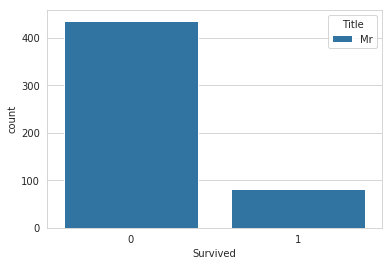

In [73]:
print( checktitle['Title'].value_counts().to_dict() )

maintitle = checktitle[checktitle['Title']=='Mr']
sns.countplot(x='Survived', hue ='Title' , data = maintitle )

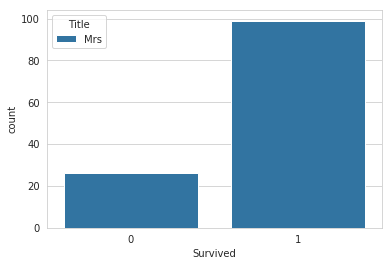

In [71]:
maintitle = checktitle[checktitle['Title']=='Mrs']
sns.countplot(x='Survived', hue ='Title' , data = maintitle )

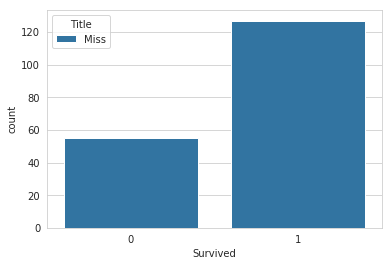

In [72]:
maintitle = checktitle[checktitle['Title']=='Miss']
sns.countplot(x='Survived', hue ='Title' , data = maintitle )

We realize  that the title in a person's name directly relates to his survival rates

In [74]:

 InitialTraindata['Title'] = InitialTraindata['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

In [75]:
InitialTraindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


## Creating Test and Train sets

After playing around with the role of the above features in deciding the fate of a person's survival, I've come to an understanding there is a significant variance in the survival rates depending on 4 main aspects which are:
* Age
* Sex
* Ticket Class
* Title 

So, we create an exclusive training dataset containing only the relavant columns specified above.

**NOTE:** I've done only surface level analysis of provided data for now, there is a huge scope of improving accuracy with more systemic analysis of provided data.

We are now replacing the titles with appropriate index. certain titles are too similar and hence are alloted similar index. For Eg:
> 'mml' and 'madam' are similar


In [92]:
train = pd.concat([InitialTraindata['Title'],InitialTraindata['Age'],InitialTraindata['Sex'],InitialTraindata['Pclass'],InitialTraindata['Survived'],InitialTraindata['Fare']],axis=1)

train['Sex'].replace('female',0,inplace=True)
train['Sex'].replace('male',1,inplace=True)

di = {'Mr': 1,'Miss': 2,'Mrs': 2,'Master': 4,'Dr': 5, 'Rev': 6,'Mlle': 7,'Major': 8,'Col': 9,'Ms': 2,'Capt': 10,'Jonkheer': 11,'Mme': 2, 'Sir': 12, 'the Countess': 13, 'Lady': 7, 'Don': 14}
train= train.replace({"Title": di})


In [93]:
Train_x, Test_x, Train_y, Test_y = train_test_split(train.drop(columns='Survived'), train['Survived'], test_size = 0.2, random_state = 0)
Train_x.info()
Train_x.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 140 to 684
Data columns (total 5 columns):
Title     712 non-null int64
Age       712 non-null float64
Sex       712 non-null int64
Pclass    712 non-null int64
Fare      712 non-null float64
dtypes: float64(2), int64(3)
memory usage: 33.4 KB


,Title,Age,Sex,Pclass,Fare
140,2,28.0,0,3,15.2458
439,1,31.0,1,2,10.5000
817,1,31.0,1,2,37.0042
378,1,20.0,1,3,4.0125
491,1,21.0,1,3,7.2500


## Training Model

Created a simple logisticRegression model using sklearn Python libray.
Using the Training data and Testing data extracted from above for training and checking the accuracy of the method.

In [94]:
#using regression model from sklearn

model = LogisticRegression(solver='lbfgs')
model.fit(Train_x,Train_y)
prediction = model.predict(Test_x)
print(model.score(Train_x, Train_y))
print(accuracy_score(Test_y, prediction))


0.8117977528089888
0.770949720670391


In [95]:
svcmodel = SVC(kernel='linear') 
svcmodel.fit(Train_x,Train_y)
prediction = svcmodel.predict(Test_x)
print(svcmodel.score(Train_x, Train_y))
print(accuracy_score(Test_y, prediction))

0.7879213483146067
0.770949720670391


From the trial run above, Logistic Regression model performs at a better accuracy. 

## Processing Test data

Predicting the output for the data in the official Test.csv using the trained model.
The predictions have to be further formatted to the required format before storing the file.

In [ ]:
evalset = pd.read_csv('../input/test.csv')
evalset['Age'] = evalset['Age'].fillna(combined['Age'].median())
evalset['Fare'] = evalset['Fare'].fillna(evalset['Fare'].mean())
evalset['Sex'].replace('female',0,inplace=True)
evalset['Sex'].replace('male',1,inplace=True)   
testset = pd.concat([evalset['Age'],evalset['Sex'],evalset['Pclass'],evalset['Fare']],axis=1)
final = model.predict(testset)

In [ ]:
final.reshape(418,1)
opcsv = pd.DataFrame({'PassengerId':evalset['PassengerId'] , 'Survived':final[:]})

opcsv.to_csv('Submission.csv',index=False)
